# Numerical Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Newton Divided Differences Table
ddnewton calculates the Newtom Divisded Differences for function f and an arry of nodes x.

In [2]:
def ddnewton(x,f):
    x=x.flatten()
    n=len(x)
    d=np.zeros([n,n+1])
    r=np.diff(x)
    d[:,0]=x
    d[:,1]=f(x)
    for i in range(2,n+1):
        d[i-1:,i]=np.divide(np.diff(d[i-2:,i-1]),r)
        r=np.convolve(np.diff(x), [1]*i, 'valid')    
    return d

### Example

In [3]:
d=ddnewton(np.array([ 0, 0.3 , 0.7, 0.9]), lambda x : x*np.sin(2*x)-x**2) 
print(d)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.3         0.07939274  0.26464247  0.          0.        ]
 [ 0.7         0.19981481  0.30105517  0.05201814  0.        ]
 [ 0.9         0.06646287 -0.66675972 -1.61302481 -1.85004773]]


In [4]:
d=ddnewton(np.array([ 0, 0.3 , 0.7, 0.9]), lambda x : x*np.sin(2**x)) 
print(d)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.3         0.28286121  0.94287069  0.          0.        ]
 [ 0.7         0.69899063  1.04032356  0.13921839  0.        ]
 [ 0.9         0.86105134  0.81030352 -0.38336674 -0.58065015]]


## Richardson Extrapolation

In [5]:
def richardson_extrapolation(f, x, h , n):
    n+=1;
    D=np.zeros([n,n])
    for i in range(n):
        D[i,0]=(f(x + h) - f(x - h))/2/h
        for j in range(1,i+1):
            D[i, j] = D[i, j - 1] + (D[i, j - 1] - D[i - 1, j - 1])/(4**j - 1)
        h=h/2
    return D

### Example

In [6]:
d = richardson_extrapolation(lambda x : (2**x)*np.sin(x), 1.05, .3 , 2)
print(d)

[[2.23476995 0.         0.        ]
 [2.26507943 2.27518259 0.        ]
 [2.27263098 2.27514816 2.27514586]]


In [7]:
d = richardson_extrapolation(lambda x : (2**(1+np.sin(x))), 1.05, .3 , 2)
print(d)

[[1.2088878  0.         0.        ]
 [1.2458372  1.25815367 0.        ]
 [1.25527252 1.25841763 1.25843523]]


# Romberg Method for inteheration

In [8]:
def romberg(f,a,b,n):
    h=b-a
    n+=1
    r=np.zeros([n,n])
    r[0,0]=0.5*h*(f(b)+f(a))
    for i in range(1,n):
        h=h/2
        sum=0
        for k in range(1,1+2**(i-1)):
            sum+=f(a+(2*k-1)*h)
        r[i,0]=.5*r[i-1,0]+sum*h;
        for j in range(1,i):
            r[i,j]=r[i, j-1]+(r[i,j-1]-r[i-1,j-1])/(4**j-1);
    return r

## Example

In [9]:
r=romberg(lambda x: 2/(1+x**2),0,1,4)
print(r)

[[1.5        0.         0.         0.         0.        ]
 [1.55       0.         0.         0.         0.        ]
 [1.56558824 1.57078431 0.         0.         0.        ]
 [1.56949425 1.57079625 1.57079705 0.         0.        ]
 [1.57047081 1.57079633 1.57079633 1.57079632 0.        ]]


In [10]:
r=romberg(lambda x: np.exp(-x**2),0,1,4)
print(r)

[[0.68393972 0.         0.         0.         0.        ]
 [0.73137025 0.         0.         0.         0.        ]
 [0.7429841  0.74685538 0.         0.         0.        ]
 [0.74586561 0.74682612 0.74682417 0.         0.        ]
 [0.7465846  0.74682426 0.74682413 0.74682413 0.        ]]


The exact value of the integeral is pi.

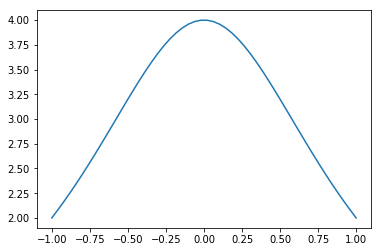

In [11]:
x=np.linspace(-1,1,50)
f= lambda x: 4/(1+x**2)
plt.plot(x,f(x))